<a href="https://colab.research.google.com/github/mindongjun/whimoon_AiLecture/blob/main/whimoon_AiLecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능(AI) 개념의 이해와 실습 특강-2일차

## 강사
이상근 고려대학교 정보보호대학원 조교수

민동준(mindongjun@korea.ac.kr) 고려대학교 정보보호대학원 정보보호학과 석사수료

조형민(whgudals159@korea.ac.kr) 고려대학교 정보보호대학원 정보보호학과 석사수료

# Medical Charge 데이터 셋 불러오기

- Task : 선형회귀를 사용한 보험료 예측

- Dataset : kaggle 공개 Dataset. 미국 의료보험료 데이터 (https://www.kaggle.com/mirichoi0218/insurance)

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mindongjun/whimoon_AiLecture/main/insurance.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###열 데이터 설명

- age: 기본 수혜자의 나이
- sex: 보험 계약자 성별, (여성, 남성)
- bmi: 체질량 지수, 키에 비해 상대적으로 높거나 낮은 체중, 신장 대 체중의 비율을 사용하여 체중의 객관적인 지수 $(kg / m ^ 2)$
- children: 건강보험 적용 자녀 수 / 피부양자 수
- smoker: 흡연 여부
- region: 미국에서 수혜자의 주거 지역, (northeast, southeast, southwest, northwest)
- charges: 건강보험에서 청구하는 개인 의료비

# 중복된 데이터(행) 확인

In [2]:
print('# of duplicated rows:', df.duplicated().sum())

# of duplicated rows: 1


# 중복 데이터(행) 제거

In [3]:
df.drop_duplicates(inplace=True)
print('# of duplicated rows:', df.duplicated().sum())

# of duplicated rows: 0


# 실수가 아닌 설명변수(feature) 수변환
### 대상: sex, smoker, region

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col]=lbl.transform(df[col].values)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 데이터 셋 생성

## 1) 설명변수, 반응변수 생성

In [7]:
#Split and Scaling Data
X=df.drop('charges',axis=1)
y=df['charges']

In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## 2) Train, Validation, Test set 생성
## (validation은 생략)

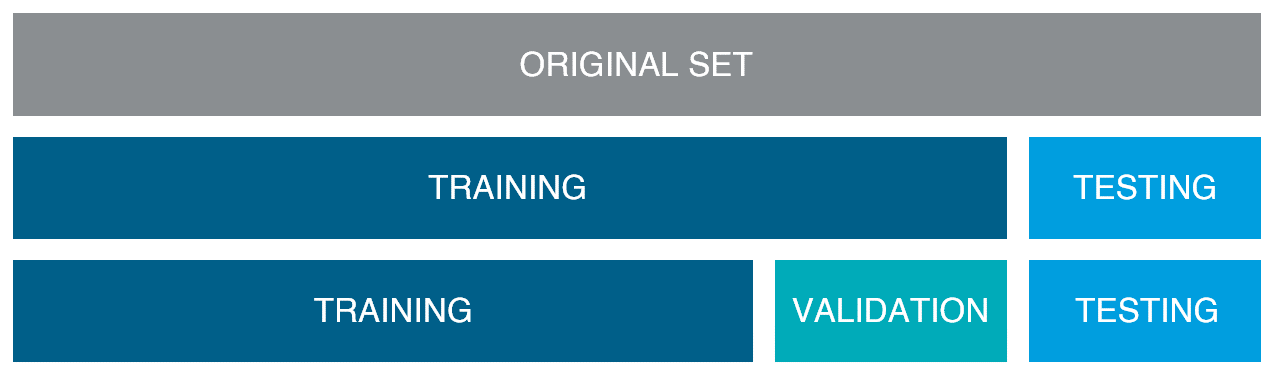


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=45)

In [9]:
print('X_train, y_train shape:', X_train.shape, y_train.shape)
print('X_test, y_test shape:', X_test.shape, y_test.shape)

X_train, y_train shape: (1069, 6) (1069,)
X_test, y_test shape: (268, 6) (268,)


# 설명 변수의 범위 스케일링(scaling)
## 표준화 $X=\frac{X - \mu}{\sigma} = \frac{X - X_{평균}}{X_{표준편차}}$
입력된 x 들의 분포를 평균이 0 이고 분산이 1 인  표준 정규 분포로 변환하는 계산

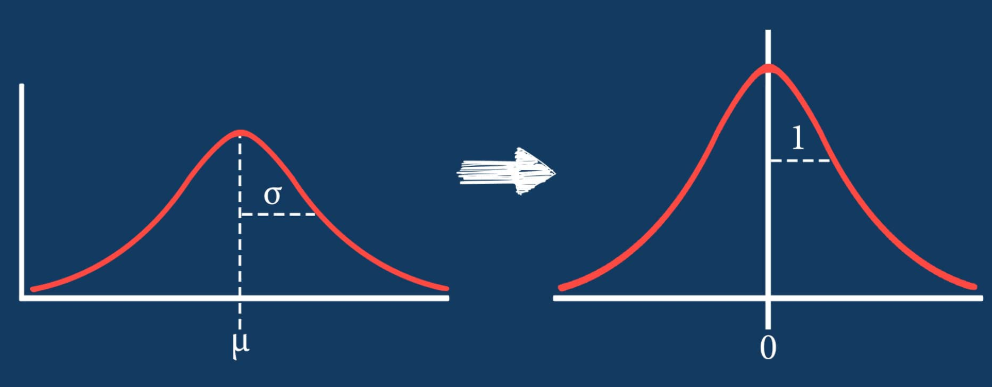

In [10]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# 선형회귀 모델 생성

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 1) 모델학습

## 회귀식 출력 (do not modify)

In [12]:
len_coef = len(regressor.coef_)
print('y = ', end='')
for i in range(len_coef+1):
    end_str = ' - ' if regressor.coef_[i-1] < 0 else ' + '

    if i == 0:
        print('%.3f'%regressor.intercept_, end='')
    elif i != len_coef:
        print('%s%.3f x%d'%(end_str, abs(regressor.coef_[i-1]), i), end='')
    else:
        print('%s%.3f x%d'%(end_str, abs(regressor.coef_[i-1]), i))
    

y = 13508.552 + 3577.962 x1 - 82.462 x2 + 2093.287 x3 + 584.946 x4 + 9808.510 x5 - 353.649 x6


## 2) 예측

In [13]:
import numpy as np

In [14]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

### a) 학습 데이터 셋 예측

In [15]:
train_pred_df = pd.DataFrame({'y_train':np.array(y_train), 'train predict':train_predict})
train_pred_df.head(10)

,y_train,train predict
0,8240.58960,11045.354540
1,13831.11520,17415.822535
2,9634.53800,13135.323934
3,11763.00090,13614.122859
4,7050.02130,9988.448136
5,14254.60820,12324.501749
6,5910.94400,7380.681384
7,11657.71890,11979.791643
8,10796.35025,11789.920703
9,2730.10785,6621.928262


### b) 테스트 데이터 셋 예측

In [16]:
train_pred_df = pd.DataFrame({'y_test':np.array(y_test), 'test predict':test_predict})
train_pred_df.head(10)

,y_test,test predict
0,14571.89080,25272.097797
1,17904.52705,28878.658821
2,5138.25670,9547.541507
3,20781.48892,12536.332424
4,1242.26000,-1351.028947
5,3877.30425,5704.940974
6,2438.05520,10875.405705
7,10797.33620,12299.887845
8,14410.93210,17269.218621
9,18218.16139,5275.369339


## 3) 평가
## $R^2=1-\frac{\sum^{n}_{i=1}(y_i-\hat{y_i})^2}{\sum^{n}_{i=1}(y_i-\bar{y_i})^2} = 1 - \frac{오차}{편차}$
### 0과 1사이의 값, 1에 가까울 수록 좋은모델(오차(분자)가 0이므로), '모델이 설명을 잘한다' 라고 볼 수 있다.

In [17]:
from sklearn.metrics import r2_score

In [18]:
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print('Train R2 score:', train_r2)
print('Test R2 score:', test_r2)

Train R2 score: 0.7534323146523124
Test R2 score: 0.7325335930063609


## 4) 관측, 예측 산점도

In [19]:
import matplotlib.pyplot as plt

### a) 학습 데이터 셋

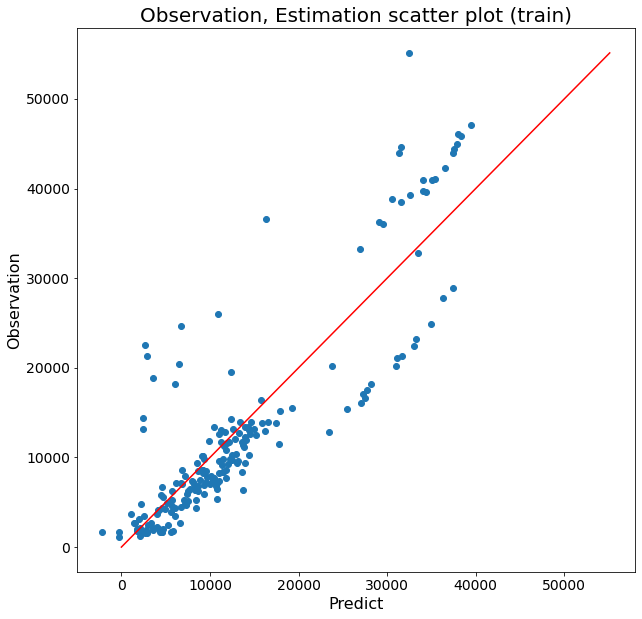

Train R2 score: 0.7534323146523124


In [35]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(train_predict[:plot_size], y_train[:plot_size])
max_value = max(train_predict[:plot_size].max(), y_train[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (train)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Train R2 score:', train_r2)

### b) 테스트 데이터 셋

[0, 51194.55914]


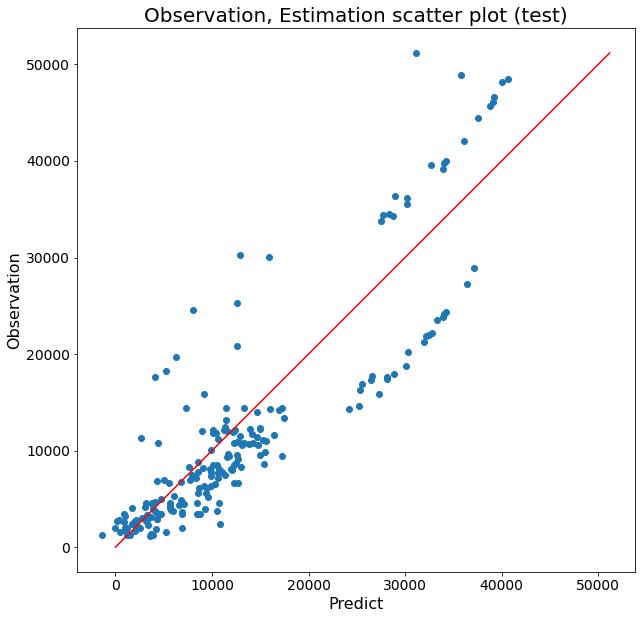

Test R2 score: 0.7325335930063609


In [30]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(test_predict[:plot_size], y_test[:plot_size])
max_value = max(test_predict[:plot_size].max(), y_test[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (test)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Test R2 score:', test_r2)

# 과제
## 1. 회귀 성능을 향상시킬수 있는 방법을 조사해 ppt로 정리해주세요
## 2. 조사한 방법을 코드에 적용하여 Test R2 성능을 향상시켜보세요